DID(differences-in-Differences)定义:
<span class="mark">一个是干预前后的差异，另一个干预组与对照组之间的差异</span>。
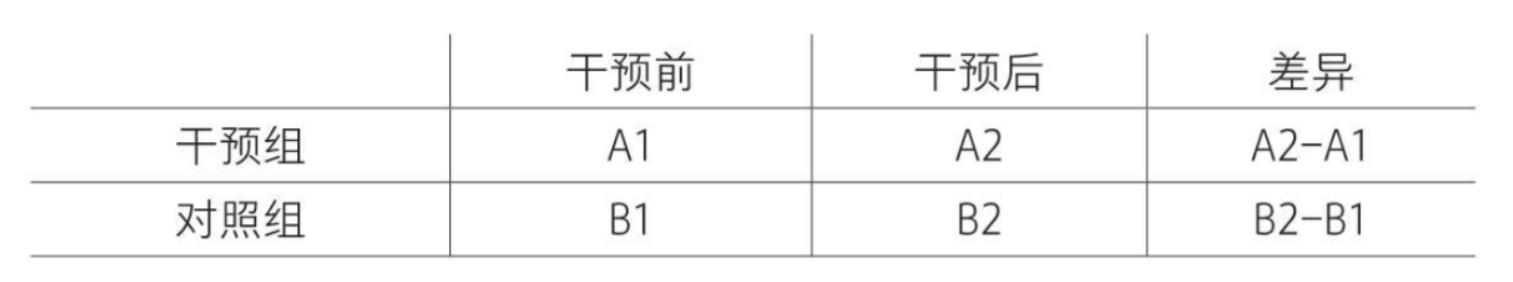
<span class="mark">二者之差{(A2-A1)-(B2-B1)}即为因果效应</span>

<span class="mark">DID表达式</span>

$y_{it}=a+\beta(G_i\times D_t)+\gamma G_i + cD_t + \varepsilon_{it}$

$G_i为分组虚拟变量(处理组=1，控制组=0);D_t为分期虚拟变量(政策实施后=1，政策实施前=0)，\\
交互项G_i \times D_t表示处理组在政策实施后的效应，其系数为双重差分模型重点考察的处理效应$

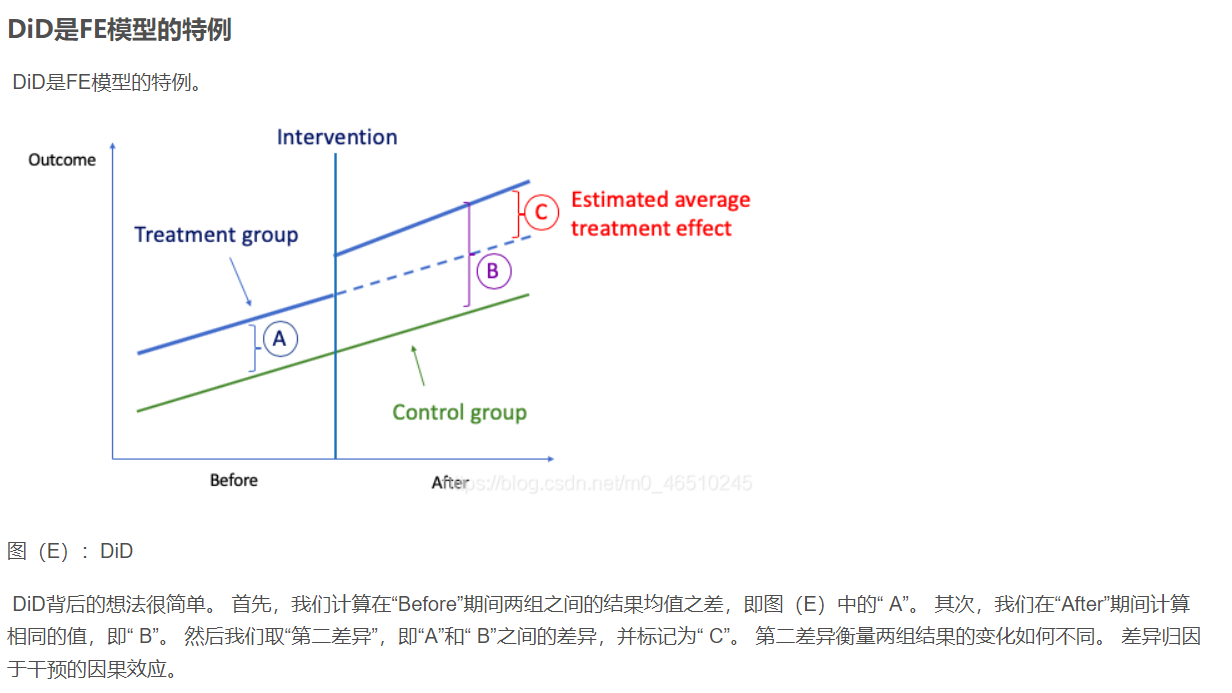

# 导入数据

In [1]:
import wooldridge as woo
import pandas as pd
data=woo.dataWoo('kielmc')
data.head()

,year,age,agesq,nbh,cbd,intst,lintst,price,rooms,area,...,lprice,y81,larea,lland,y81ldist,lintstsq,nearinc,y81nrinc,rprice,lrprice
0,1978,48,2304.0,4,3000.0,1000.0,6.9078,60000.0,7,1660,...,11.002100,0,7.414573,8.429017,0.0,47.717705,1,0,60000.0,11.002100
1,1978,83,6889.0,4,4000.0,1000.0,6.9078,40000.0,6,2612,...,10.596635,0,7.867871,9.032409,0.0,47.717705,1,0,40000.0,10.596635
2,1978,58,3364.0,4,4000.0,1000.0,6.9078,34000.0,6,1144,...,10.434115,0,7.042286,8.517193,0.0,47.717705,1,0,34000.0,10.434115
3,1978,11,121.0,4,4000.0,1000.0,6.9078,63900.0,5,1136,...,11.065075,0,7.035269,9.210340,0.0,47.717705,1,0,63900.0,11.065075
4,1978,48,2304.0,4,4000.0,2000.0,7.6009,44000.0,5,1868,...,10.691945,0,7.532624,9.210340,0.0,57.773682,1,0,44000.0,10.691945


# 数据预处理

In [2]:
df=data[['year','rprice','nearinc']]
#取year=0的所有数据，同时对比nearinc中焚烧和不焚烧的rprice是否有差距
data1=list(list(df[df.year==1978]['rprice'].groupby(df.nearinc))[0][1])#1978年，住房不靠近焚化炉
data2=list(list(df[df.year==1978]['rprice'].groupby(df.nearinc))[1][1])#1978年，住房靠近焚化炉
data1_after=list(list(df[df.year==1981]['rprice'].groupby(df.nearinc))[0][1])#1981年,住房不靠近焚化炉的价格
data2_after=list(list(df[df.year==1981]['rprice'].groupby(df.nearinc))[1][1])#1981年，住房靠近焚化炉的价格
#nearinc：住房是否靠近焚化炉，靠近取1，否则取0

# 对比分析

In [14]:
#分析住房不靠近焚化炉的价格变动
df1=pd.DataFrame({'1978年不靠近焚化炉的住房价格':data1})
df1_after=pd.DataFrame({'1981年不靠近焚化炉的住房价格':data1_after})
df1_compare=pd.concat([df1.describe(),df1_after.describe()],axis=1)
df1_compare['不靠近焚化炉的变化百分比']=\
(df1_compare['1981年不靠近焚化炉的住房价格']-df1_compare['1978年不靠近焚化炉的住房价格'])/df1_compare['1978年不靠近焚化炉的住房价格']*100

#分析住房靠近焚化炉的价格变动
df2=pd.DataFrame({'1978年靠近焚化炉的住房价格':data2})
df2=df2[df2['1978年靠近焚化炉的住房价格']!=df2['1978年靠近焚化炉的住房价格'].max()]
df2_after=pd.DataFrame({'1981年靠近焚化炉的住房价格':data2_after})
df2_compare=pd.concat([df2.describe(),df2_after.describe()],axis=1)
df2_compare['靠近焚化炉的变化百分比']=\
(df2_compare['1981年靠近焚化炉的住房价格']-df2_compare['1978年靠近焚化炉的住房价格'])/df2_compare['1978年靠近焚化炉的住房价格']*100

pd.concat([df1_compare,df2_compare],axis=1)

,1978年不靠近焚化炉的住房价格,1981年不靠近焚化炉的住房价格,不靠近焚化炉的变化百分比,1978年靠近焚化炉的住房价格,1981年靠近焚化炉的住房价格,靠近焚化炉的变化百分比
count,123.000000,102.000000,-17.073171,55.000000,40.000000,-27.272727
mean,82517.227642,101307.513595,22.771349,59396.363636,70619.239844,18.894888
std,20831.099570,29741.118410,42.772677,28391.469530,34816.795310,22.631184
min,26000.000000,40629.800781,56.268465,31000.000000,31490.015625,1.580696
25%,69000.000000,80011.519531,15.958724,44000.000000,51075.269531,16.080158
50%,84300.000000,102342.550781,21.402789,50900.000000,57949.308594,13.849329
75%,94000.000000,122887.867188,30.731774,61500.000000,80203.531250,30.412246
max,142500.000000,180147.468750,26.419276,185000.000000,207373.265625,12.093657


# 图形分析

Text(0.5, 1.0, '1981年')

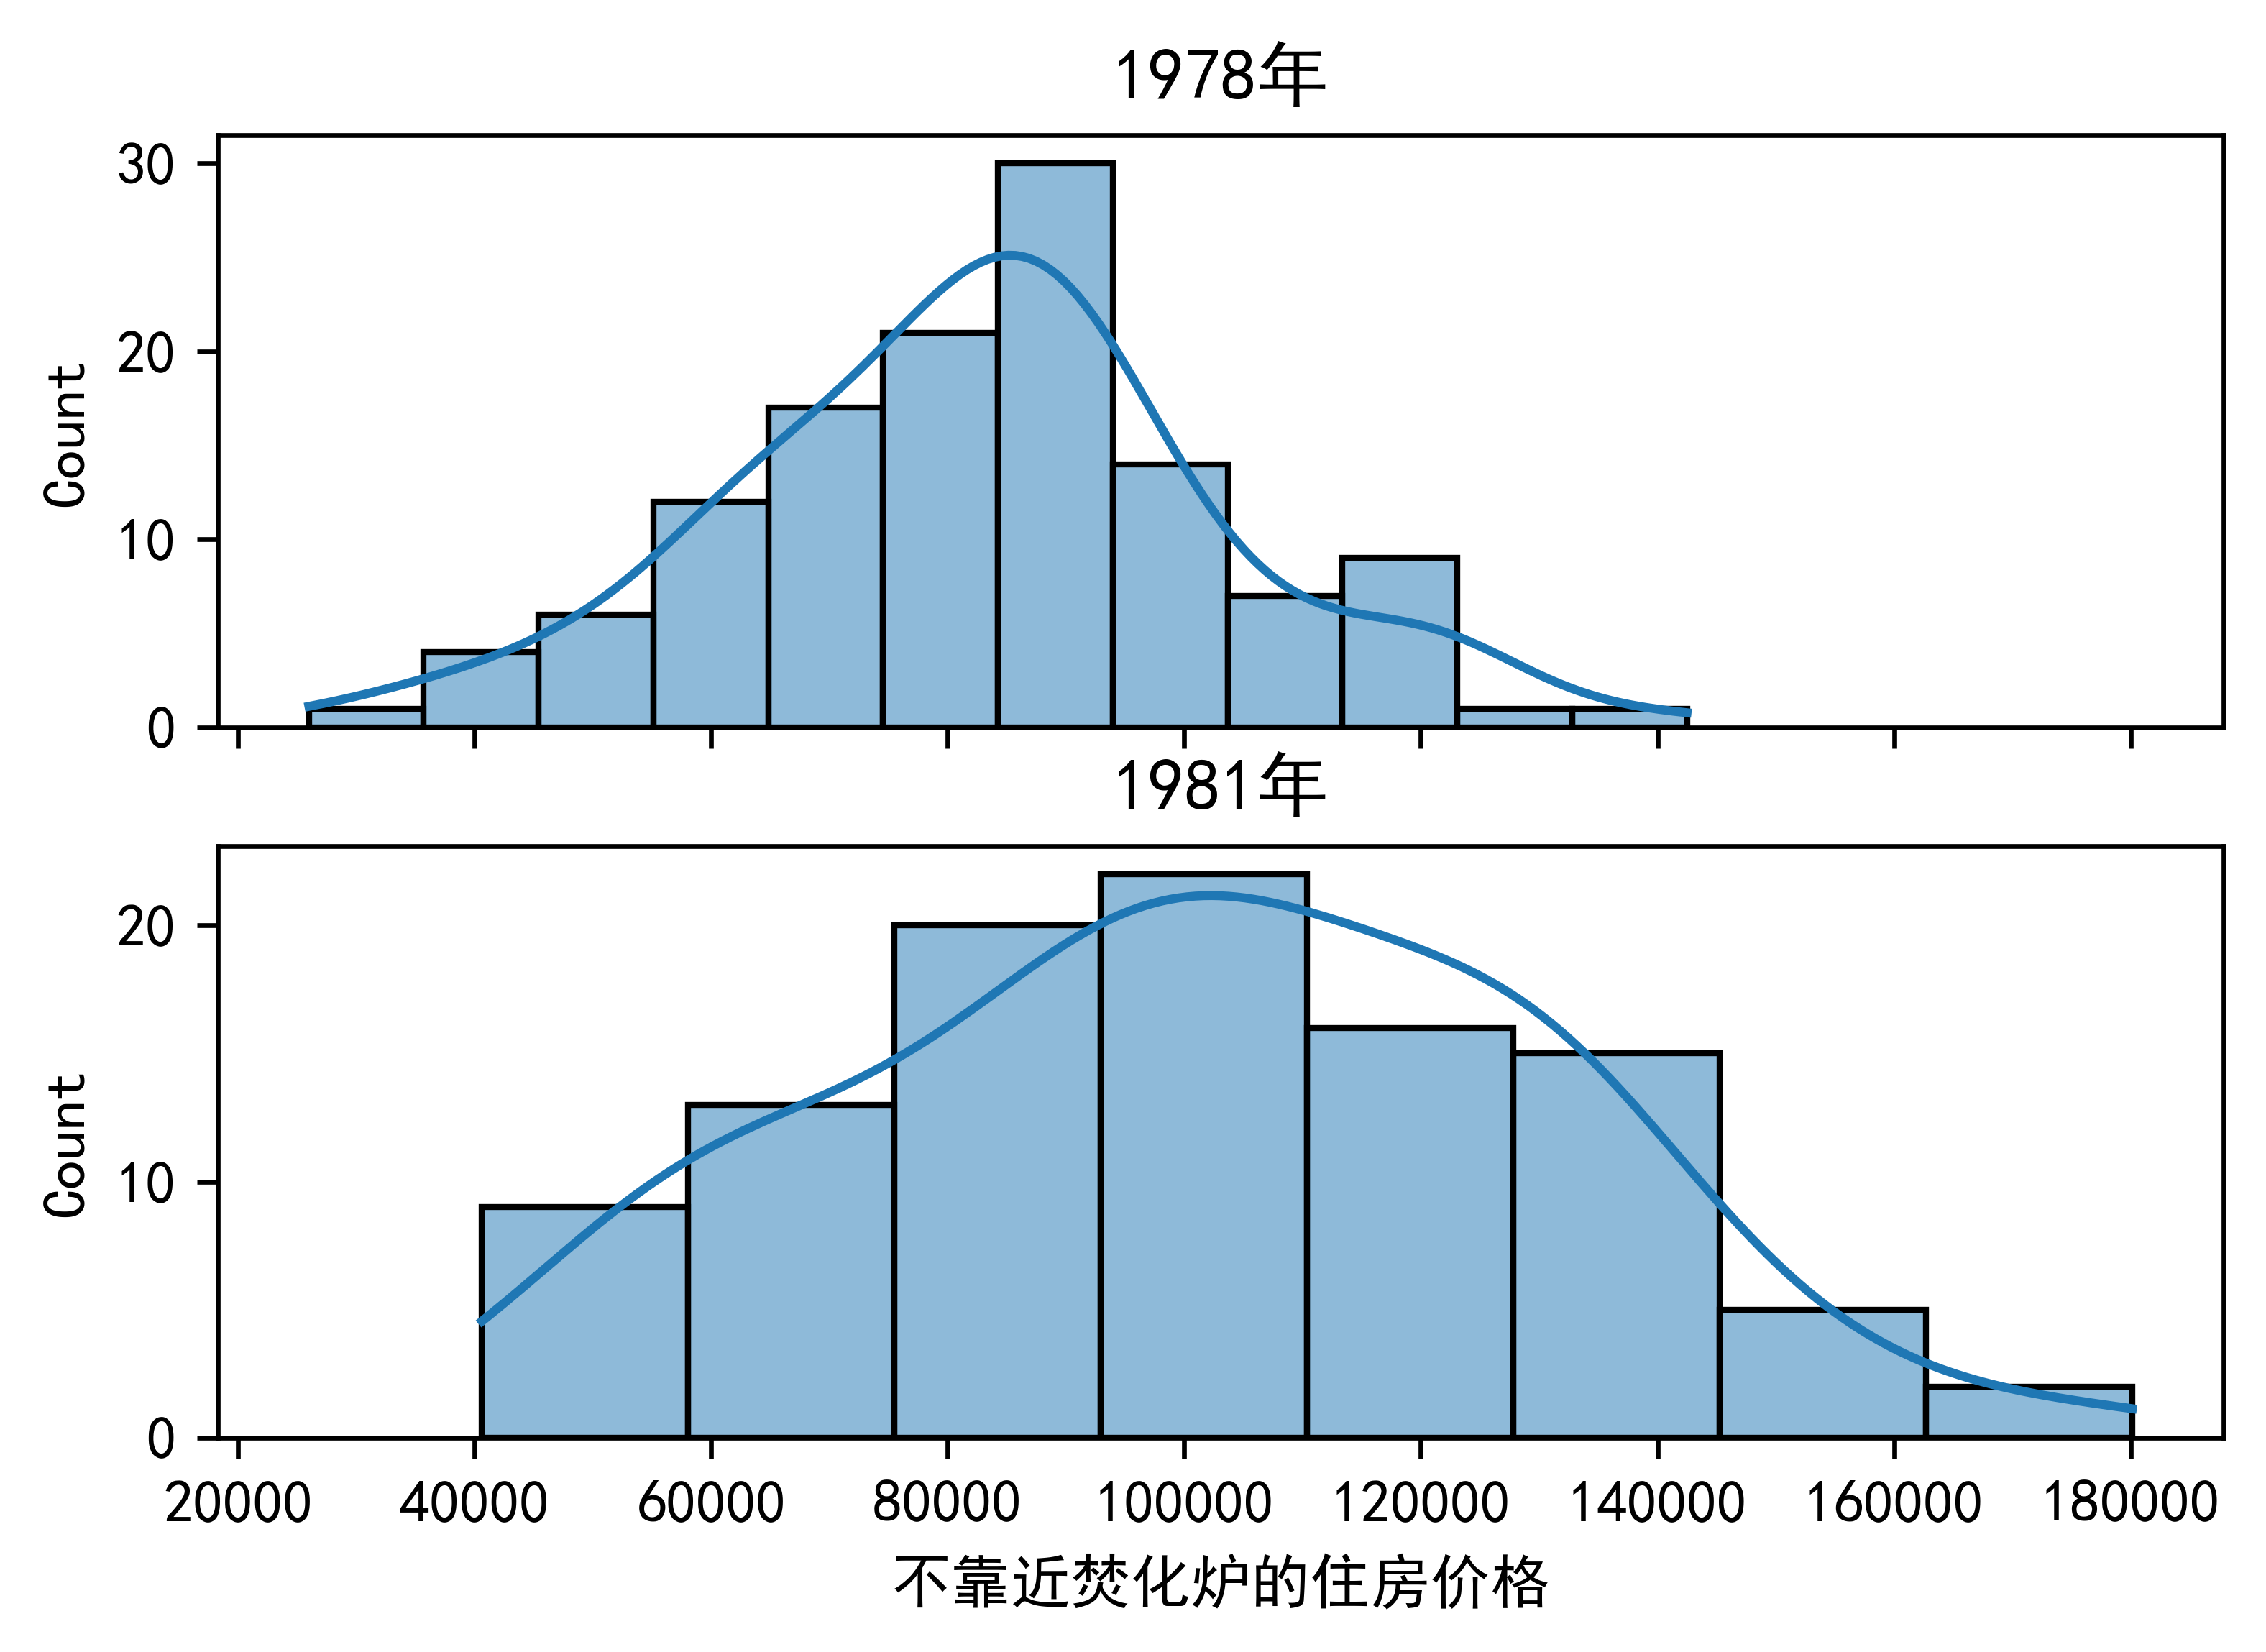

In [187]:
import seaborn
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['font.sans-serif']=['simhei']
fig,ax=plt.subplots(2,1,sharex=True,dpi=600)
seaborn.histplot(data=df1,x='1978年不靠近焚化炉的住房价格',ax=ax[0],kde=True)
seaborn.histplot(data=df1_after,x='1981年不靠近焚化炉的住房价格',ax=ax[1],kde=True)
ax[1].set_xlabel('不靠近焚化炉的住房价格')
ax[0].set_title('1978年')
ax[1].set_title('1981年')

Text(0.5, 1.0, '1981年')

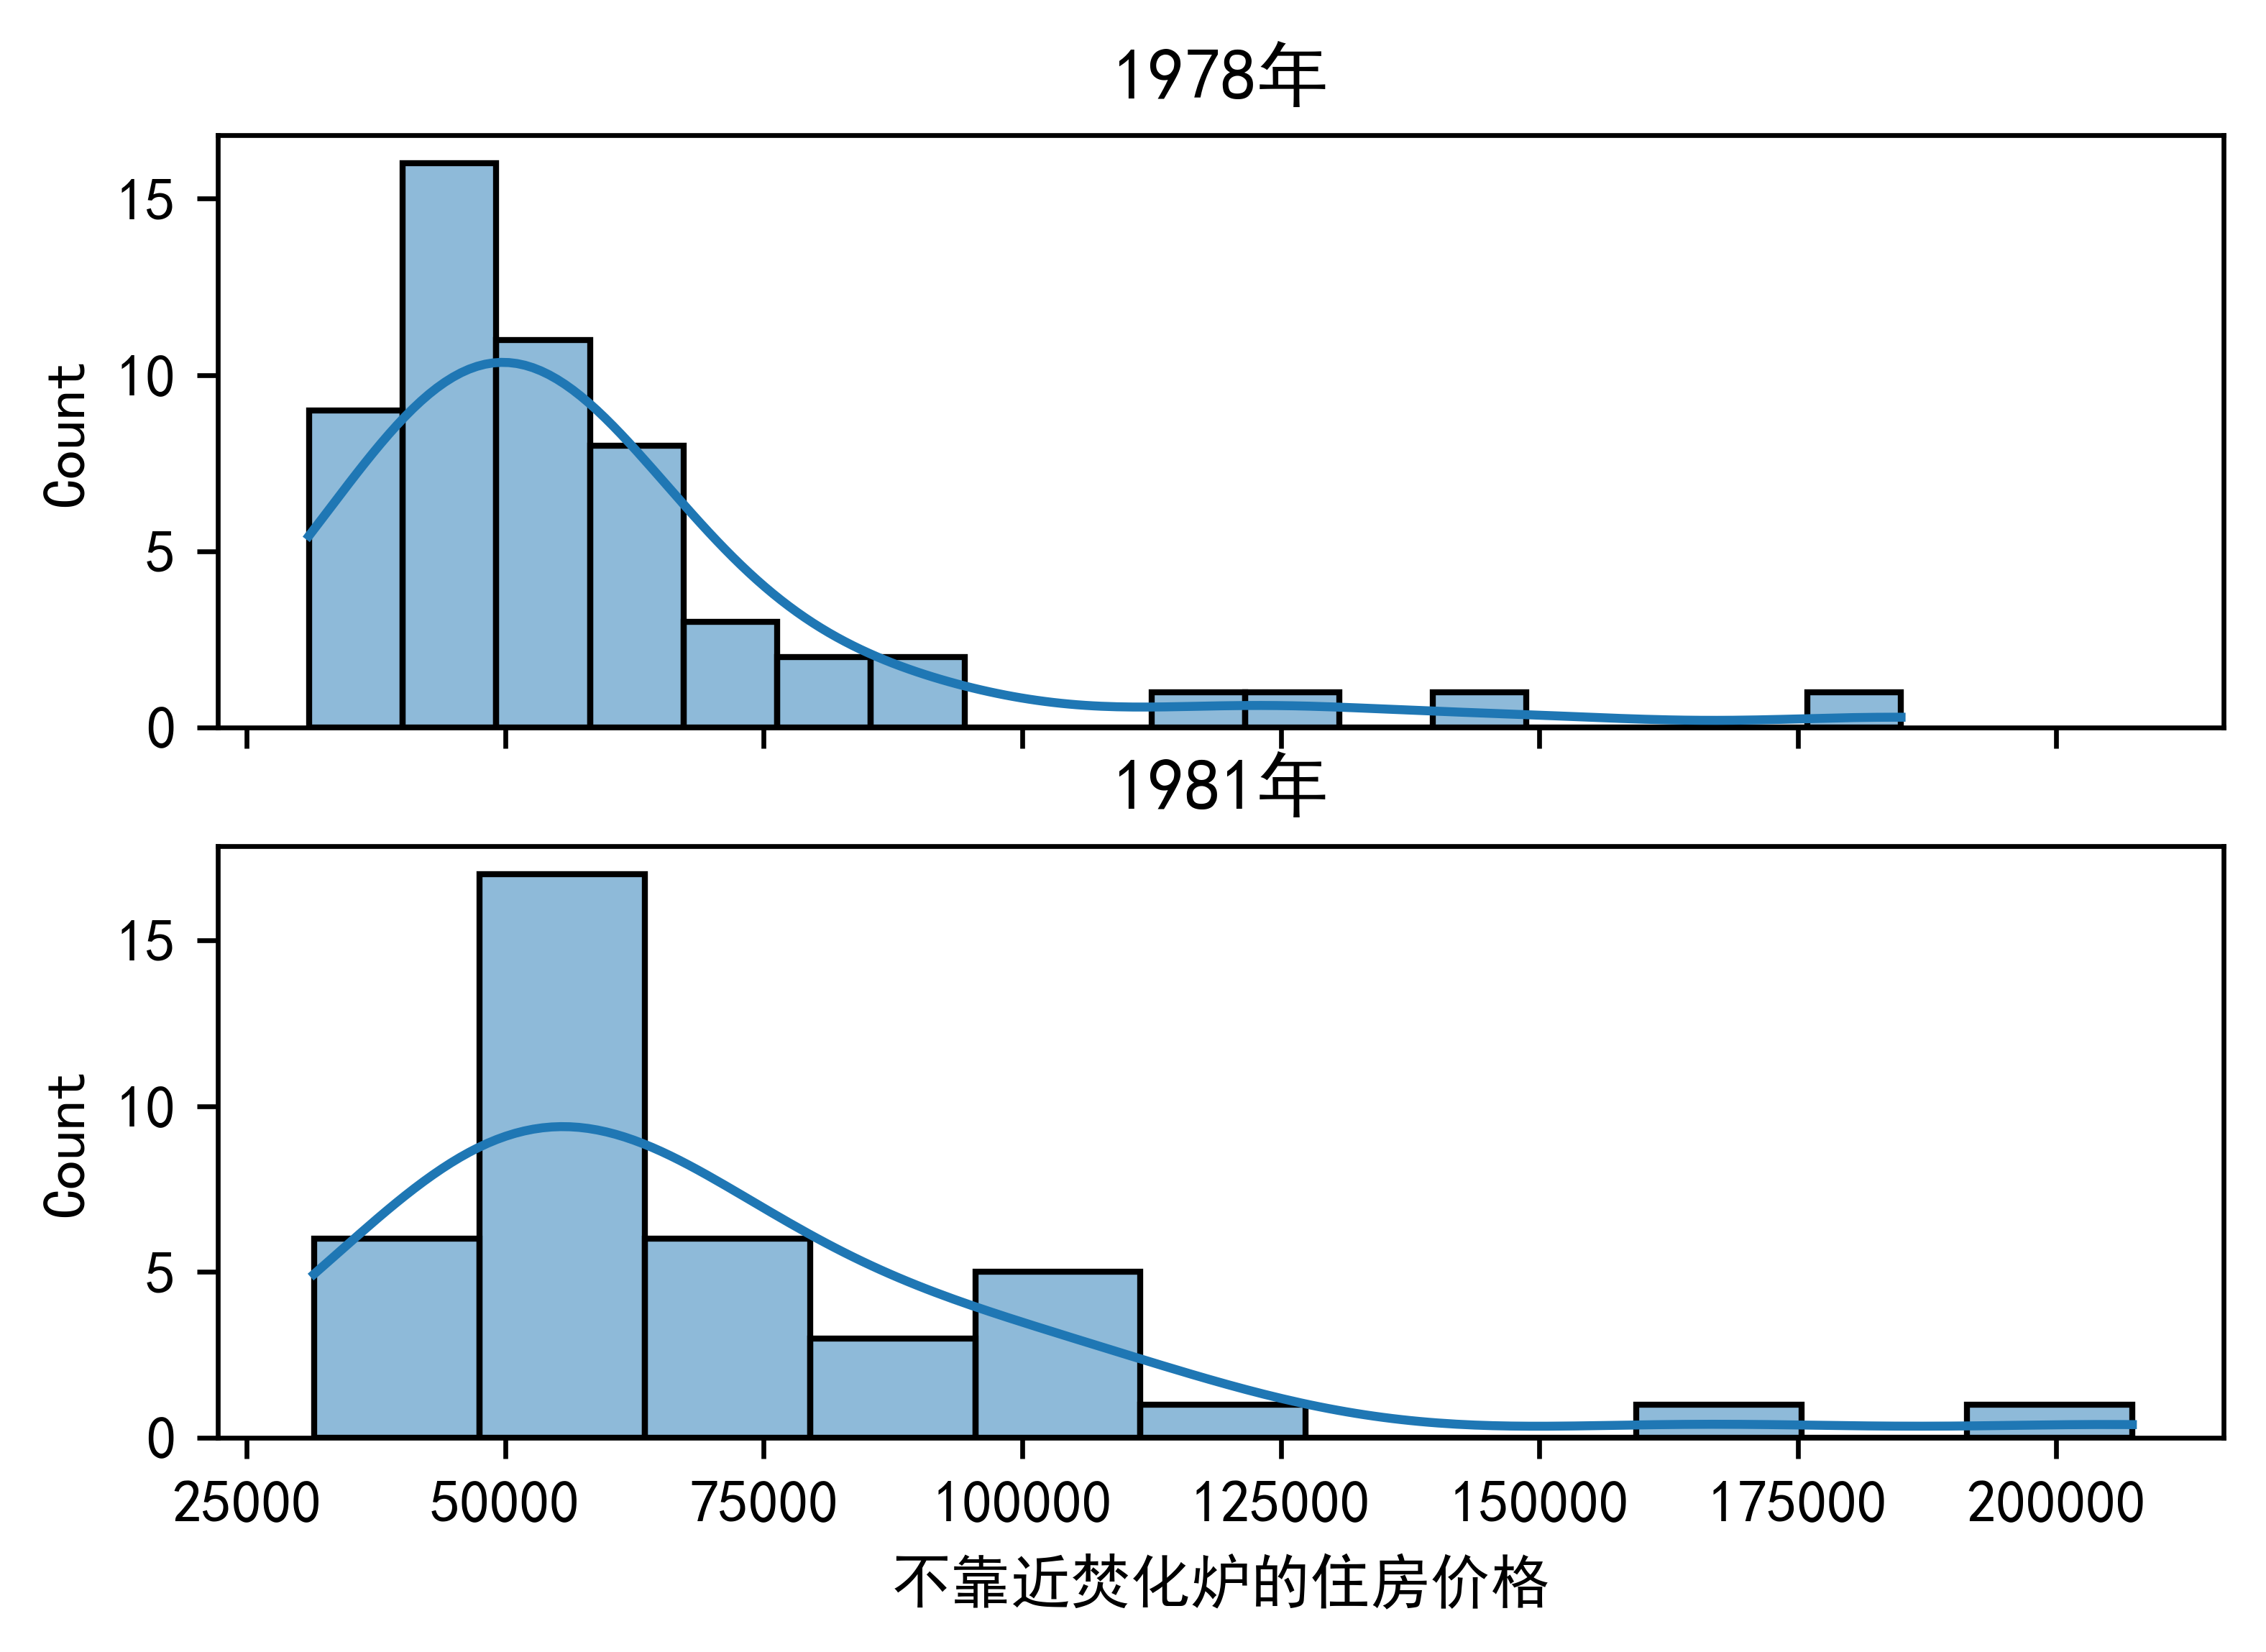

In [188]:
fig,ax=plt.subplots(2,1,sharex=True,dpi=600)
seaborn.histplot(data=df2,x='1978年靠近焚化炉的住房价格',ax=ax[0],kde=True)
seaborn.histplot(data=df2_after,x='1981年靠近焚化炉的住房价格',ax=ax[1],kde=True)
ax[1].set_xlabel('靠近焚化炉的住房价格')
ax[1].set_xlabel('不靠近焚化炉的住房价格')
ax[0].set_title('1978年')
ax[1].set_title('1981年')

# DID分析

In [115]:
import statsmodels.formula.api as stat
#DID模型
DID=stat.ols(formula='rprice~nearinc*C(year)',data=data)#C(year)是指的将year这个指标虚拟变量化
did=DID.fit()
print(did.summary())
#显著系数为0.113>0.05，经过3年的时间，焚化炉是否靠近住房对房价没有显著的影响

                            OLS Regression Results                            
Dep. Variable:                 rprice   R-squared:                       0.174
Model:                            OLS   Adj. R-squared:                  0.166
Method:                 Least Squares   F-statistic:                     22.25
Date:                Thu, 10 Nov 2022   Prob (F-statistic):           4.22e-13
Time:                        15:40:23   Log-Likelihood:                -3765.2
No. Observations:                 321   AIC:                             7538.
Df Residuals:                     317   BIC:                             7554.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                8

# 加入控制变量的DID

In [134]:
#加入控制变量，即房子的年龄
DID=stat.ols(formula='rprice~nearinc*C(year)+age+agesq',data=data)
did=DID.fit()
print(did.summary())
#结论就是房子的年龄非常影响住房价格与焚化炉之间的因果关系

                            OLS Regression Results                            
Dep. Variable:                 rprice   R-squared:                       0.414
Model:                            OLS   Adj. R-squared:                  0.405
Method:                 Least Squares   F-statistic:                     44.59
Date:                Thu, 10 Nov 2022   Prob (F-statistic):           1.00e-34
Time:                        16:25:24   Log-Likelihood:                -3710.0
No. Observations:                 321   AIC:                             7432.
Df Residuals:                     315   BIC:                             7455.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                8